In [26]:

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


def file_dict(file,col):
    data=pd.read_csv(file)
    text=''
    for row in data.index:
        text=text+data.loc[row,col]

    okt=Okt() # Open Korean Text 객체 생성


    sentences_tag=okt.pos(text)

    noun_list=[]
    # tag가 명사인 단어들만 noun_list에 넣어준다.
    for word,tag in sentences_tag:
        if tag =='Noun':
            noun_list.append(word)

    # 가장 많이 나온 단어부터 80개를 저장한다.
    counts=Counter(noun_list)
    tags=counts.most_common(80)
    #print(tags)



    dict_tags=dict(tags)


    # 제외단어
    word_pop=['면접','후기','것','수','및','글','이','데이터','댓글','머신','딥','러닝',
            '개발자','데이타','나','더','내','글뷰','검색','카카오','블로그','준비','인공','지능','때','그','대해','제',
            '등','대한','때문','위','를']

    for word in word_pop:
        if word in dict_tags:
            dict_tags.pop(word)
    
    return dict_tags

developer='developer.csv'
datasci='datascientist.csv'
dataeng='dataengineer.csv'
machineng='machineengineer.csv'
deppeng='deepengineer.csv'
ai='ai.csv'

developer1="개발자 면접후기_naver_blog.csv"
dataeng1="데이터엔지니어 면접후기_naver_blog.csv"
machineng1='머신러닝엔지니어 면접후기_naver_blog.csv'
# 워드 클라우드 플롯
# dict_tags=file_dict(developer)    
# wordcld(dict_tags)



In [27]:
# 개발자, 데이터 엔지니어, 머신러닝 추출
devel_df=pd.DataFrame(pd.Series(file_dict(developer,'내용')),columns=['개발자'])
dataeng_df=pd.DataFrame(pd.Series(file_dict(dataeng,'내용')),columns=['데이터엔지니어'])
machineng_df=pd.DataFrame(pd.Series(file_dict(machineng,'내용')),columns=['머신러닝엔지니어'])

In [28]:
# 네이버버전 추출
devel1_df=pd.DataFrame(pd.Series(file_dict(developer1,'description')),columns=['개발자'])
dataeng1_df=pd.DataFrame(pd.Series(file_dict(dataeng1,'description')),columns=['데이터엔지니어'])
machineng1_df=pd.DataFrame(pd.Series(file_dict(machineng1,'description')),columns=['머신러닝엔지니어'])

In [29]:
# 전체 비율 구하는 함수
def ratio(df):
    df_ratio = round(df/df.sum()*100,2)
    return df_ratio


In [30]:
devel_df=devel_df+devel1_df
dataeng_df=dataeng_df+dataeng1_df
machineng_df=machineng_df+machineng1_df

In [36]:
dataDF=ratio(devel_df).join(ratio(dataeng_df),how='inner').join(ratio(machineng_df),how='inner')
dataDF.dropna(inplace=True)

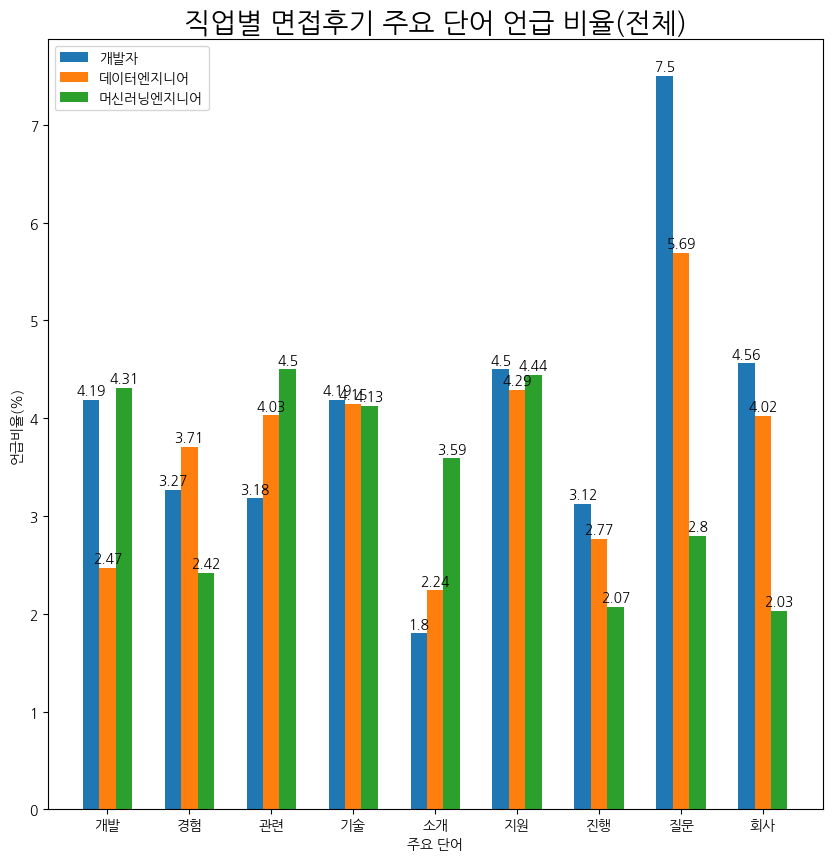

In [38]:
import koreanize_matplotlib
x=pd.Series(range(9))
plt.figure(figsize=(10,10))
a=plt.bar(x-0.2,dataDF['개발자'],width=0.2,label='개발자')
b=plt.bar(x,dataDF['데이터엔지니어'],width=0.2,label='데이터엔지니어')
c=plt.bar(x+0.2,dataDF['머신러닝엔지니어'],width=0.2,label='머신러닝엔지니어')
plt.xticks(x,dataDF.index)
plt.title('직업별 면접후기 주요 단어 언급 비율(전체)',fontsize=20)
plt.xlabel('주요 단어')
plt.ylabel('언급비율(%)')
plt.bar_label(a,padding=2)
plt.bar_label(b,padding=2)
plt.bar_label(c,padding=2)
plt.legend()
plt.show()

In [32]:
bar=pd.concat([dataDF.loc['질문'],dataDF.loc['생각'],dataDF.loc['개발'],dataDF.loc['공부'],dataDF.loc['사용'],dataDF.loc['알고리즘']],axis=1)
bar

,질문,생각,개발,공부,사용,알고리즘
개발자,7.50,5.29,4.19,2.62,NaN,NaN
데이터엔지니어,5.69,5.30,2.47,NaN,NaN,NaN
머신러닝엔지니어,2.80,NaN,4.31,2.54,4.9,NaN


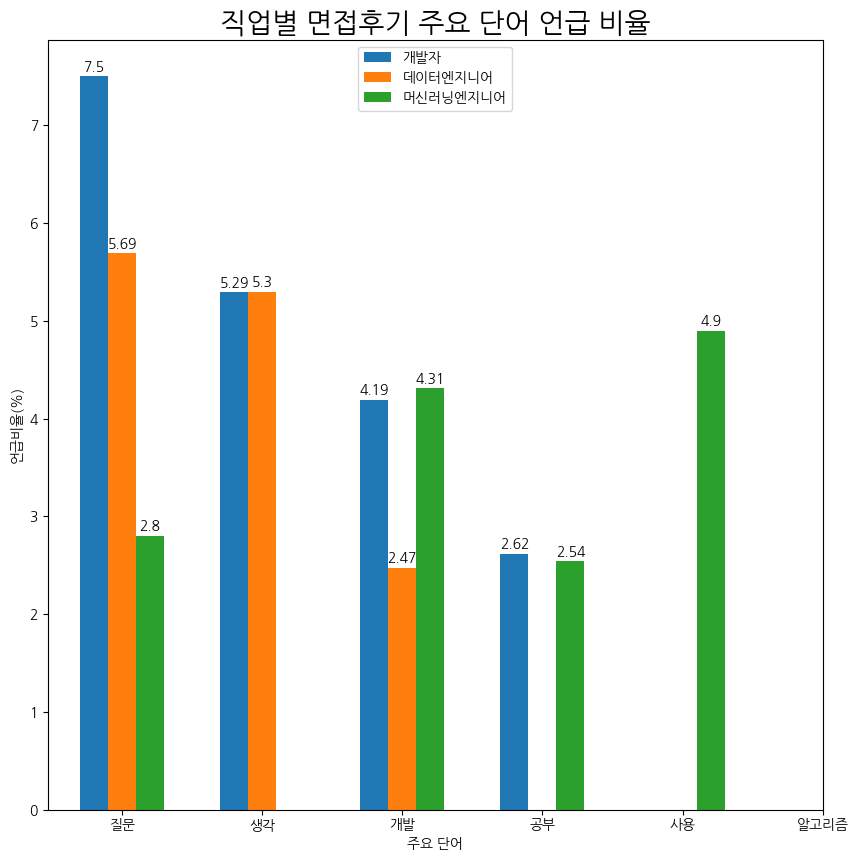

In [33]:
import koreanize_matplotlib
x=pd.Series(range(6))
plt.figure(figsize=(10,10))
a=plt.bar(x-0.2,bar.loc['개발자'],width=0.2,label='개발자')
b=plt.bar(x,bar.loc['데이터엔지니어'],width=0.2,label='데이터엔지니어')
c=plt.bar(x+0.2,bar.loc['머신러닝엔지니어'],width=0.2,label='머신러닝엔지니어')
plt.xticks(x,['질문','생각','개발','공부','사용','알고리즘'])
plt.title('직업별 면접후기 주요 단어 언급 비율',fontsize=20)
plt.xlabel('주요 단어')
plt.ylabel('언급비율(%)')
plt.bar_label(a,padding=2)
plt.bar_label(b,padding=2)
plt.bar_label(c,padding=2)
plt.legend()
plt.show()